## LangGraph

In [17]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [1]:
def function1(input1):
    return input1 + " from 1st funtion"
    
def function2(input2):
    return input2 + " and now it is merged to 2nd funtion"

def function3(input3):
    pass

In [2]:
function1("vijay")

'vijay from 1st funtion'

In [3]:
from langgraph.graph import Graph

In [4]:
workflow1=Graph()

In [5]:
workflow1.add_node("fun1",function1)
workflow1.add_node("fun2",function2)

In [6]:
workflow1.add_edge("fun1","fun2")

In [7]:
## entry and exist points
workflow1.set_entry_point("fun1")
workflow1.set_finish_point("fun2")

In [8]:
app=workflow1.compile()


In [9]:
from IPython.display import Image, display

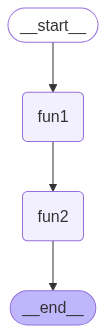

In [10]:
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
## Now lets execute the app

app.invoke("vijay")

'vijay from 1st funtion and now it is merged to 2nd funtion'

In [12]:
## lets visulize output from each function


In [20]:
def llm(input):
    os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    output=model.invoke(input)
    return output.content

In [21]:
def token_counter(input):
    tokens=input.split()
    token_number=len(tokens)
    return f"total no of tokens in the answer is : {token_number}"
    

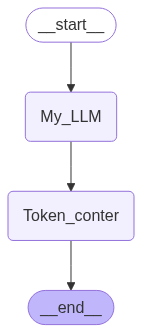

In [22]:
workflow2=Graph()
workflow2.add_node("My_LLM",llm)
workflow2.add_node("Token_conter", token_counter)
workflow2.add_edge("My_LLM","Token_conter")

workflow2.set_entry_point("My_LLM")
workflow2.set_finish_point("Token_conter")

app2=workflow2.compile()

display(Image(app2.get_graph().draw_mermaid_png()))


In [23]:
app2.invoke("can you tell about india capital")

'total no of tokens in the answer is : 49'

In [28]:
for output in app2.stream("can you tell about india capital"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
India's capital is **New Delhi**.  While the city is often referred to simply as Delhi,  New Delhi is the official capital territory,  a planned city built within the larger historical city of Delhi.  New Delhi serves as the seat of the Indian government, housing important buildings like the Parliament House, Rashtrapati Bhavan (President's House), and various ministries.


here is output from Token_conter
_______
total no of tokens in the answer is : 57


